## Observations and Insights 

In [141]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
import numpy as np

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single dataset
combined_mousedata = pd.merge(mouse_metadata,study_results, how='outer', on='Mouse ID')
# Display the data table for preview
combined_mousedata.head()

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1


In [72]:
# Checking the number of mice.
combined_mousedata.count()

Mouse ID              1893
Drug Regimen          1893
Sex                   1893
Age_months            1893
Weight (g)            1893
Timepoint             1893
Tumor Volume (mm3)    1893
Metastatic Sites      1893
dtype: int64

In [73]:
# Getting the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 
duplicate_mousedata = combined_mousedata[combined_mousedata.duplicated(["Mouse ID", "Timepoint"], keep = False)]
duplicate_mousedata["Mouse ID"].value_counts()

g989    10
Name: Mouse ID, dtype: int64

In [74]:
# Optional: Get all the data for the duplicate mouse ID. 
duplicate_mousedata

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
908,g989,Propriva,Female,21,26,0,45.000000,0
909,g989,Propriva,Female,21,26,0,45.000000,0
910,g989,Propriva,Female,21,26,5,48.786801,0
911,g989,Propriva,Female,21,26,5,47.570392,0
912,g989,Propriva,Female,21,26,10,51.745156,0
913,g989,Propriva,Female,21,26,10,49.880528,0
914,g989,Propriva,Female,21,26,15,51.325852,1
915,g989,Propriva,Female,21,26,15,53.442020,0
916,g989,Propriva,Female,21,26,20,55.326122,1
917,g989,Propriva,Female,21,26,20,54.657650,1


In [87]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
cond = combined_mousedata["Mouse ID"].isin(duplicate_mousedata["Mouse ID"])
combined_mousedata.drop(combined_mousedata[cond].index, inplace = True)
clean_mousedata = combined_mousedata
clean_mousedata

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1
...,...,...,...,...,...,...,...,...
1888,z969,Naftisol,Male,9,30,25,63.145652,2
1889,z969,Naftisol,Male,9,30,30,65.841013,3
1890,z969,Naftisol,Male,9,30,35,69.176246,4
1891,z969,Naftisol,Male,9,30,40,70.314904,4


In [89]:
# Checking the number of mice in the clean DataFrame.
clean_mousedata["Mouse ID"].count()

1880

## Summary Statistics

In [106]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

# Use groupby and summary statistical methods to calculate the following properties of each drug regimen: 
grouped_drugregimen = clean_mousedata.groupby(["Drug Regimen"])

# mean, median, variance, standard deviation, and SEM of the tumor volume. 
tumor_volume_mean = grouped_drugregimen["Tumor Volume (mm3)"].mean()
tumor_volume_median = grouped_drugregimen["Tumor Volume (mm3)"].median()
tumor_volume_variance = grouped_drugregimen["Tumor Volume (mm3)"].var()
tumor_volume_stdev = grouped_drugregimen["Tumor Volume (mm3)"].std()
tumor_volume_SEM = grouped_drugregimen["Tumor Volume (mm3)"].sem()

# Assemble the resulting series into a single summary dataframe.
summary_drugregimen = pd.DataFrame([])
summary_drugregimen["Tumor Volume Mean"] = tumor_volume_mean
summary_drugregimen["Tumor Volume Median"] = tumor_volume_median
summary_drugregimen["Tumor Volume Variance"] = tumor_volume_variance
summary_drugregimen["Tumor Volume Standard Deviation"] = tumor_volume_stdev
summary_drugregimen["Tumor Volume SEM"] = tumor_volume_SEM

summary_drugregimen

,Tumor Volume Mean,Tumor Volume Median,Tumor Volume Variance,Tumor Volume Standard Deviation,Tumor Volume SEM
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


In [107]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

# Using the aggregation method, produce the same summary statistics in a single line
aggregate_summary_drugregimen = grouped_drugregimen.agg(['mean','median','var','std','sem'])["Tumor Volume (mm3)"]
aggregate_summary_drugregimen

,mean,median,var,std,sem
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


## Bar and Pie Charts

Text(0, 0.5, 'Number of Mice')

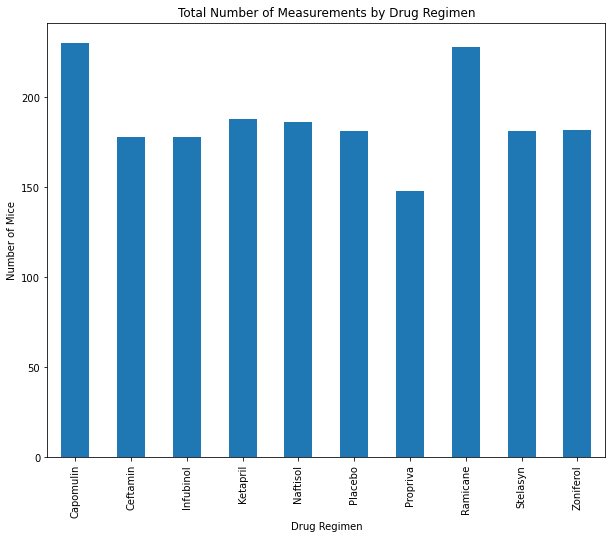

In [317]:
# Generate a bar plot showing the total number of measurements taken on each drug regimen using pandas.
total_mice_per_regimen = clean_mousedata.groupby(["Drug Regimen"]).count()["Mouse ID"]

total_mice_per_regimen.plot.bar(figsize=(10,8))
plt.title("Total Number of Measurements by Drug Regimen")
plt.ylabel("Number of Mice")

Text(0, 0.5, 'Number of Mice')

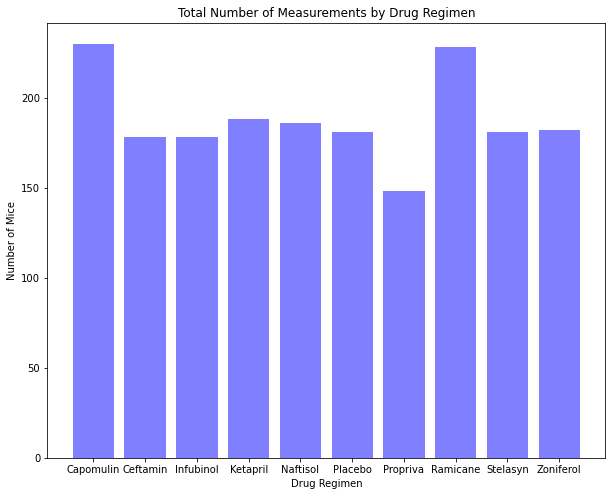

In [318]:
# Generate a bar plot showing the total number of measurements taken on each drug regimen using pyplot.

#Drug Label list for x-axis labels
DrugRegimen_list = summary_drugregimen.index.tolist()

#Plot chart
plt.figure(figsize=(10,8))
plt.bar(DrugRegimen_list,total_mice_per_regimen, color = 'b', alpha = 0.5 ,align = "center")
plt.title("Total Number of Measurements by Drug Regimen")
plt.xlabel("Drug Regimen")
plt.ylabel("Number of Mice")

Text(0.5, 1.0, 'Distribution of Mice by Gender')

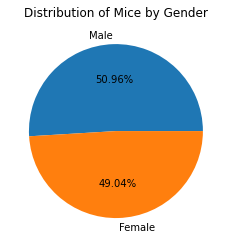

In [321]:
# Generate a pie plot showing the distribution of female versus male mice using pandas

#Count of mice by Gender
mice_per_gender = clean_mousedata["Sex"].value_counts()

mice_per_gender.plot.pie(autopct="%1.2f%%", ylabel = '')
plt.title("Distribution of Mice by Gender")



Text(0.5, 1.0, 'Distribution of Mice by Gender')

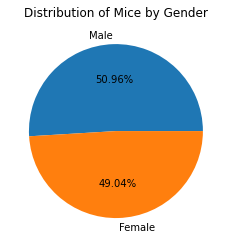

In [320]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot

#List of Genders
Gender_List = mice_per_gender.index.tolist() 
Gender_List

plt.pie(mice_per_gender, labels = Gender_List, autopct = "%1.2f%%")
plt.title("Distribution of Mice by Gender")

## Quartiles, Outliers and Boxplots

In [264]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin

# Start by getting the last (greatest) timepoint for each mouse
timepoint_group = clean_mousedata.groupby("Mouse ID").max()["Timepoint"]

# Merge this group df with the original dataframe to get the tumor volume at the last timepoint
max_timepoint_mousedata = pd.merge(clean_mousedata,timepoint_group, how='right', on=['Mouse ID','Timepoint'])
max_timepoint_mousedata = max_timepoint_mousedata.sort_values(["Drug Regimen"], ascending = True).reset_index()
max_timepoint_mousedata

,index,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,66,g316,Capomulin,Female,22,22,45,40.159220,2
1,180,s710,Capomulin,Female,1,23,45,40.728578,1
2,183,t565,Capomulin,Female,20,17,45,34.455298,0
3,169,r944,Capomulin,Male,12,25,45,41.581521,2
4,163,r554,Capomulin,Female,8,17,45,32.377357,3
...,...,...,...,...,...,...,...,...,...
243,215,w575,Zoniferol,Female,16,28,45,68.401286,3
244,30,c302,Zoniferol,Female,10,29,45,64.575222,4
245,28,c264,Zoniferol,Female,11,27,45,67.942121,2
246,155,q511,Zoniferol,Female,2,28,45,68.611061,3


In [298]:
# Put treatments into a list for for loop and later plot labels
treatment_list = ['Capomulin', 'Ramicane', 'Infubinol', 'Ceftamin']
                                             
# Create empty list to fill with tumor vol data (for plotting)
tumor_volume = []

# Calculate the IQR and quantitatively determine if there are any potential outliers. 
    
    # Locate the rows which contain mice on each drug and get the tumor volumes
for treatment in treatment_list:
    
    four_drugregimen_data = max_timepoint_mousedata[max_timepoint_mousedata['Drug Regimen'] == treatment]
    
    #Get the final tumor volume for each drug regimen
    final_tumor_volume = four_drugregimen_data["Tumor Volume (mm3)"]
    tumor_volume.append(final_tumor_volume)
    
    #Find the IQR for each treatment
    quartiles = final_tumor_volume.quantile([.25,.5,.75])
    lowerq = quartiles[0.25]
    upperq = quartiles[0.75]
    iqr = upperq - lowerq
 
    #Determine outliers using upper and lower bounds
    lower_bound = lowerq - (1.5*iqr)
    upper_bound = upperq + (1.5*iqr)
    outliers = (four_drugregimen_data.loc[(four_drugregimen_data["Tumor Volume (mm3)"] < lower_bound) | (four_drugregimen_data["Tumor Volume (mm3)"] > upper_bound), :])
    index = outliers.index
    outlier_count = len(index)
    
    #Print IQR and Upper and Lower Bound Data
    print(f'The IQR for {treatment}: {iqr}')
    print(f'The Lower Bound for {treatment}: {lower_bound}')
    print(f'The Upper Bound for {treatment}: {upper_bound}')
    print(f'The Number of Outliers for {treatment}: {outlier_count}')

The IQR for Capomulin: 7.781863460000004
The Lower Bound for Capomulin: 20.70456164999999
The Upper Bound for Capomulin: 51.83201549
The Number of Outliers for Capomulin: 0
The IQR for Ramicane: 9.098536719999998
The Lower Bound for Ramicane: 17.912664470000003
The Upper Bound for Ramicane: 54.30681135
The Number of Outliers for Ramicane: 0
The IQR for Infubinol: 11.477135160000003
The Lower Bound for Infubinol: 36.83290494999999
The Upper Bound for Infubinol: 82.74144559000001
The Number of Outliers for Infubinol: 1
The IQR for Ceftamin: 15.577752179999997
The Lower Bound for Ceftamin: 25.355449580000002
The Upper Bound for Ceftamin: 87.66645829999999
The Number of Outliers for Ceftamin: 0


<function matplotlib.pyplot.show(close=None, block=None)>

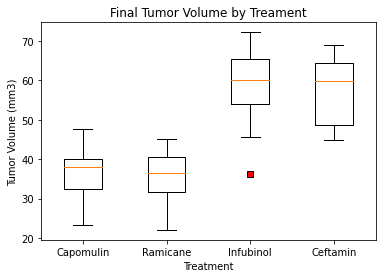

In [331]:
# Generate a box plot of the final tumor volume of each mouse across four regimens of interest
redbox = dict(markerfacecolor = 'r', marker = 's')
fig1, ax1 = plt.subplots()
ax1.set_title('Final Tumor Volume by Treament')
ax1.set_ylabel('Tumor Volume (mm3)')
ax1.set_xlabel('Treatment')
ax1.boxplot(tumor_volume, labels = treatment_list, flierprops = redbox)
plt.show


## Line and Scatter Plots

In [16]:
# Generate a line plot of tumor volume vs. time point for a mouse treated with Capomulin


In [17]:
# Generate a scatter plot of average tumor volume vs. mouse weight for the Capomulin regimen


## Correlation and Regression

In [18]:
# Calculate the correlation coefficient and linear regression model 
# for mouse weight and average tumor volume for the Capomulin regimen
